In [2]:
pip install tensorflow

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.63.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [34]:
train_data=pd.read_csv("Train_data.csv")
test_data=pd.read_csv("test_data.csv")



# Data clean

In [35]:
train_data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [36]:
test_data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

# Preformin Exploratory Data Analysis(PEDA)

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin                   

In [39]:
train_data.describe()
test_data.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,...,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,0.490044,0.506797,0.485502,0.528136,0.509783,0.504347,0.501042,0.516185,0.510145,0.501105,...,0.498538,0.489365,0.501706,0.487933,0.500615,0.499675,0.493794,0.515541,0.510077,0.517365
std,0.284196,0.282871,0.298818,0.292610,0.290887,0.302865,0.294501,0.279954,0.285213,0.290614,...,0.288848,0.290849,0.286729,0.292726,0.285374,0.301451,0.292400,0.287223,0.294011,0.291645
min,0.001827,0.003088,0.000719,0.000006,-0.000206,0.000552,0.004556,0.000309,-0.000614,0.000719,...,0.001885,-0.000991,0.001036,-0.000546,-0.000312,0.002047,0.002145,0.008831,0.005714,-0.000991
25%,0.236664,0.268021,0.201994,0.276155,0.264944,0.218573,0.246255,0.287755,0.259967,0.255839,...,0.238772,0.239302,0.262516,0.229095,0.251076,0.239369,0.228581,0.262924,0.267101,0.263192
50%,0.496471,0.502397,0.477706,0.538642,0.511102,0.518103,0.496275,0.533319,0.498332,0.493929,...,0.503164,0.481549,0.511373,0.481533,0.515321,0.497846,0.507581,0.526299,0.508479,0.546542
75%,0.727144,0.754638,0.750028,0.789486,0.767896,0.768466,0.761107,0.746765,0.761956,0.734817,...,0.749527,0.725472,0.756136,0.741867,0.739248,0.775458,0.751124,0.777839,0.781128,0.776940
max,0.991742,0.999606,0.997876,0.999507,0.999646,0.997267,1.000857,0.996362,0.999234,0.999666,...,0.999826,0.999265,0.999567,1.000744,1.000326,1.000402,0.999857,0.999348,1.000125,0.999488


# Train And Test

In [40]:
# FS
selected_features = ['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets', 'White Blood Cells',
                     'Red Blood Cells', 'Hematocrit', 'Mean Corpuscular Volume', 
                     'Mean Corpuscular Hemoglobin', 'Mean Corpuscular Hemoglobin Concentration', 
                     'Insulin', 'BMI', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 
                     'Triglycerides', 'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST', 
                     'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein']


In [41]:
missing_features_train = [feature for feature in selected_features if feature not in train_data.columns]
missing_features_test = [feature for feature in selected_features if feature not in test_data.columns]

if missing_features_train:
    print("Error: Some selected features are not present in the training dataset:", missing_features_train)
elif missing_features_test:
    print("Error: Some selected features are not present in the testing dataset:", missing_features_test)
else:
    X_train = train_data[selected_features]
    y_train = train_data['Disease']
    X_test = test_data[selected_features]
    y_test = test_data['Disease']


In [42]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
all_labels = pd.concat([y_train, y_test], axis=0)
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

LabelEncoder()

In [44]:
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [45]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Neural Model

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=len(selected_features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [47]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=42, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/42
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2313 - loss: -0.7127 - val_accuracy: 0.6049 - val_loss: -4.1479
Epoch 2/42
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2346 - loss: -20.6969 - val_accuracy: 0.6049 - val_loss: -31.4666
Epoch 3/42
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2453 - loss: -129.7990 - val_accuracy: 0.6070 - val_loss: -111.7567
Epoch 4/42
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3076 - loss: -410.8592 - val_accuracy: 0.6091 - val_loss: -270.4413
Epoch 5/42
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3363 - loss: -940.7827 - val_accuracy: 0.6070 - val_loss: -520.5179
Epoch 6/42
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3428 - loss: -1745.1353 - val_accuracy: 0.6049 - val_loss: -881.8149
Epoch 7/42
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3295 - loss: -2913.9016 - val_accuracy: 0.6008 - val_loss: -1353.5544
Epoch 8/42
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

In [73]:
# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >0.1).astype(int)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step


# Evaluate model performance

In [74]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# visualization

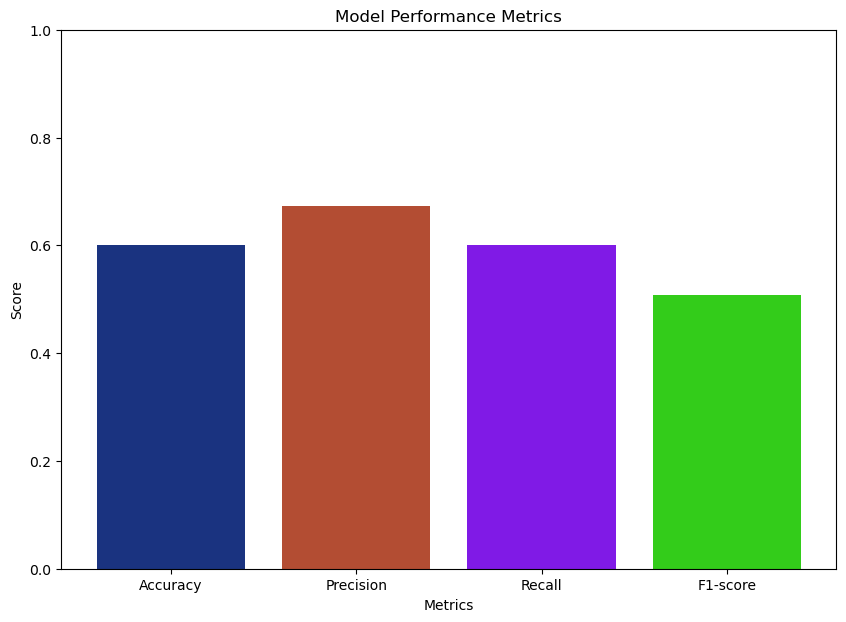

In [77]:
# data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]
plt.figure(figsize=(10, 7))
plt.bar(metrics, scores, color=[(0.1, 0.2, 0.5), (0.7, 0.3, 0.2), (0.5, 0.1, 0.9), (0.2, 0.8, 0.1)])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.ylim(0, 1)  
plt.show()

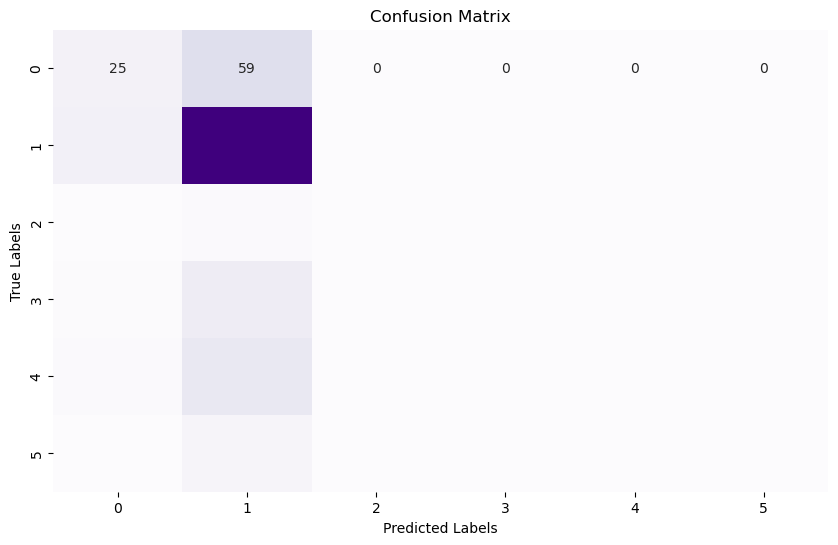

In [78]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
